# Code Clause Data Science Intern 

# Name : Pooja Shantaram Garate

# Task 2  : Gold Price Prediction

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

# Import Data

In [2]:
df = pd.read_csv("Gold_Price_Data.csv")
df.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


# Exploratory Data Analysis [EDA]

In [4]:
df.shape

(2290, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

# Correlation

In [7]:
correlation = df.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot:>

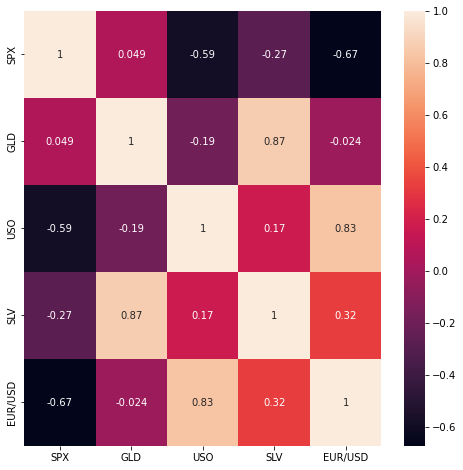

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,annot=True)

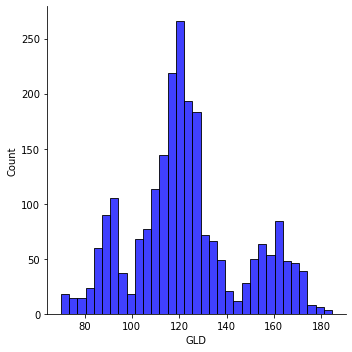

In [9]:
sns.displot(df['GLD'],color="b")

# Spliting Data Into Dependent & Independent

In [10]:
X = df[['SPX','USO','SLV','EUR/USD']]
x = X.iloc[:,:].values
x

array([[1.44716003e+03, 7.84700010e+01, 1.51800000e+01, 1.47169200e+00],
       [1.44716003e+03, 7.83700030e+01, 1.52850000e+01, 1.47449100e+00],
       [1.41163000e+03, 7.73099980e+01, 1.51670000e+01, 1.47549200e+00],
       ...,
       [2.72307007e+03, 1.44100000e+01, 1.57400000e+01, 1.19175300e+00],
       [2.73012988e+03, 1.43800000e+01, 1.55600000e+01, 1.19311800e+00],
       [2.72578003e+03, 1.44058000e+01, 1.54542000e+01, 1.18203300e+00]])

In [11]:
y = df.iloc[:,2].values 
y

array([ 84.860001,  85.57    ,  85.129997, ..., 125.18    , 124.489998,
       122.5438  ])

# Spliting into Training & Testing Data

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [13]:
x_train.shape

(1832, 4)

In [14]:
x_test.shape

(458, 4)

In [15]:
y_train.shape

(1832,)

In [16]:
y_train.shape

(1832,)

# Linear Regression Model

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(x_test)
y_pred

array([121.893539  , 142.52364868, 158.91453793, 114.2187805 ,
       110.36659025, 104.50331873, 109.98245681,  92.18483425,
       120.90649253, 123.318912  , 191.2074328 , 118.60055338,
       112.11950573,  93.46765189, 102.30779779,  97.98184003,
       118.85518215,  94.0029039 , 119.86781484, 116.59909644,
       122.21215189, 142.45378454, 121.22332281, 120.62860463,
       163.30049944, 104.70315921, 125.56912816,  87.10875178,
        95.73671386,  86.93309315, 121.81073623, 147.1233332 ,
       144.33048658, 121.95542705, 121.2464489 ,  94.5371824 ,
       152.31281012, 113.94185408, 110.92710898, 182.21152503,
        97.46373243, 128.50200625, 120.48416906, 140.20343573,
       120.16866258,  90.96452083,  82.43780029, 123.52782293,
       144.52004651, 113.76951398, 123.14800018, 159.28339044,
       141.34969761,  88.97598628, 163.39595336, 142.38892627,
       109.31495867, 119.81421995,  93.1108709 , 129.67869305,
       119.96744889, 142.21550112, 115.80809495, 115.07

In [20]:
accuracy = metrics.r2_score(y_test, y_pred)
print('R-Squared Error for lr :', accuracy)

R-Squared Error for lr : 0.8696713120900417


# Random Forest Model

In [21]:
rf = RandomForestRegressor(n_estimators=100)

In [22]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [23]:
y_pred = rf.predict(x_test)
y_pred

array([113.67650044, 147.86120114, 141.52159862, 112.56840191,
       113.57109967,  95.69439926, 111.82449968,  93.35139919,
       120.79540101, 127.03729934, 147.92479945, 120.42399895,
       119.10160054,  88.15480093,  96.12020033,  92.64779843,
       116.44690032,  89.33689908, 125.43610139, 114.69710031,
       118.97839964, 153.00590217, 122.76989805, 120.08509974,
       171.49559975, 108.45299839, 120.54940051,  87.23399861,
        87.86980037,  88.49629883, 121.26630099, 154.27030189,
       148.4601993 , 125.97570005, 126.60459999,  90.81069864,
       154.99999986, 121.3684018 , 106.79320061, 144.14939705,
        92.59629917, 127.68260083, 117.36900062, 152.7209014 ,
       119.22449933,  91.43140197,  79.59869986, 120.35660149,
       132.15450043, 119.05419969, 127.22730068, 165.6957008 ,
       153.47320058,  92.6636993 , 148.53289983, 152.41479906,
       112.95470098, 112.86380044,  87.35689929, 127.83199917,
       125.27740093, 151.78870272, 114.46810004, 110.62

In [24]:
accuracy = metrics.r2_score(y_test, y_pred)
print('R-Squared Error for rf :', accuracy)

R-Squared Error for rf : 0.9881284652923014
